## Bounds set to [coordinate 1, coordinate2]

In [235]:
bounds = [37.8331119, -122.4834356, 37.8280722, -122.4981393]

In [177]:
import requests
import urllib

## Insert Query Params to URL

In [178]:
url = "https://www.strava.com/api/v3/segments/explore?"
params = {'bounds':bounds,'access_token':'5a49c3ebf480b8a2f73c2543c4474a3ea8d6c78d'}
urlEncodedParams = urllib.parse.urlencode(params)

## Make Get Request

In [179]:
res = requests.get(url+urlEncodedParams)

In [180]:
import pandas as pd

In [182]:
segmentNames = pd.DataFrame.from_dict(res.json()['segments'])['name'].tolist()

In [183]:
segmentNames

['Mount Lemmon',
 'Cinderella Trail DH',
 'Palomar Mt South Grade (Taco shop to Summit Stop Sign)',
 'Chantry Flat from the Gate',
 'San Bruno Hill Climb',
 'Old La Honda - Mile 1']

In [184]:
segmentIds = pd.DataFrame.from_dict(res.json()['segments'])['id'].tolist()

## Synchronously fetch segment leaderboard data, then extract moving times

In [211]:
responses = []
for segmentId in segmentIds:
    url = "https://www.strava.com/api/v3/segments/{}/leaderboard/?".format(segmentId)
    params = {'access_token':'5a49c3ebf480b8a2f73c2543c4474a3ea8d6c78d','per_page':'1'}
    urlEncodedParams = urllib.parse.urlencode(params)
    res = requests.get(url+urlEncodedParams)
    responses.append(res)
movingTimes = [res.json()['entries'][0]['moving_time'] for res in responses]    

In [218]:
movingTimesSegmentNamesTuples = []
for segmentName,movingTime in zip(segmentNames,movingTimes):
    movingTimesSegmentNamesTuples.append((movingTime,segmentName))

In [219]:
movingTimesSegmentNamesTuples

[(4738, 'Mount Lemmon'),
 (71, 'Cinderella Trail DH'),
 (3075, 'Palomar Mt South Grade (Taco shop to Summit Stop Sign)'),
 (763, 'Chantry Flat from the Gate'),
 (868, 'San Bruno Hill Climb'),
 (236, 'Old La Honda - Mile 1')]

## Sort segments according to moving times

In [220]:
movingTimesSegmentNamesTuples.sort(reverse=True)

In [221]:
movingTimesSegmentNamesTuples

[(4738, 'Mount Lemmon'),
 (3075, 'Palomar Mt South Grade (Taco shop to Summit Stop Sign)'),
 (868, 'San Bruno Hill Climb'),
 (763, 'Chantry Flat from the Gate'),
 (236, 'Old La Honda - Mile 1'),
 (71, 'Cinderella Trail DH')]

In [225]:
import matplotlib.pyplot as plt

## Plot graph and save as pdf

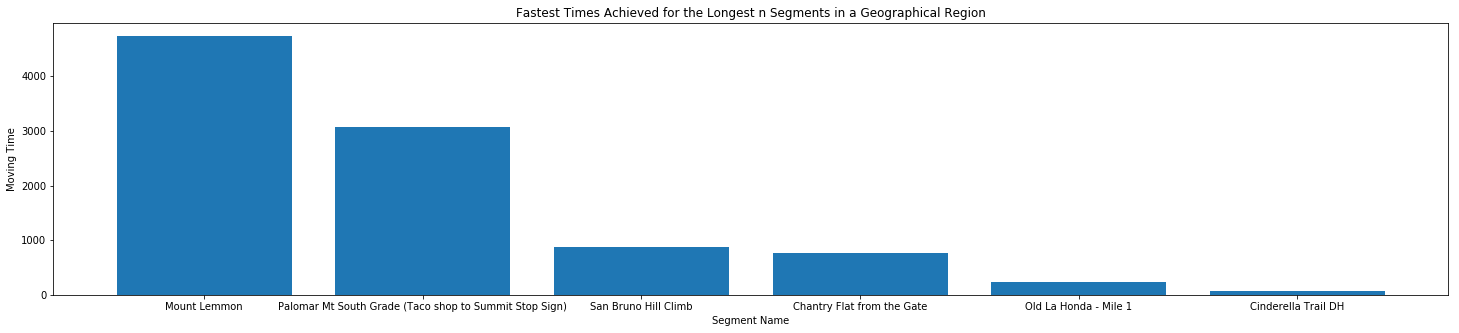

In [234]:
index = range(len(movingTimesSegmentNamesTuples))
f = plt.figure(figsize=(25,5))
plt.bar(range(len(movingTimesSegmentNamesTuples)),[tup[0] for tup in movingTimesSegmentNamesTuples])
plt.xticks(index, [tup[1] for tup in movingTimesSegmentNamesTuples])
plt.title("Fastest Times Achieved for the Longest n Segments in a Geographical Region")
plt.ylabel("Moving Time")
plt.xlabel("Segment Name")
f.savefig("foo.pdf", bbox_inches='tight')